**Mike Leske**  
**R00183658** 

---

# **Load data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/Assignment2/data.h5.zip"
!ls

Archive:  /content/gdrive/My Drive/Colab Notebooks/Assignment2/data.h5.zip
  inflating: data1.h5                
data1.h5  gdrive  sample_data


In [ ]:
import numpy as np
import h5py

'''
Function to load the data from disk
'''
def loadDataH5():
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))

        print(trainX.shape, trainY.shape)
        print(valX.shape, valY.shape)

    return trainX, trainY, valX, valY
	
'''
Load the data
'''
trainX, trainY, valX, valY = loadDataH5()


'''
Function to plot training/validation loss/accuracy
'''
def plot_loss(history, epochs, configuration):
    print('\n\n')
    plt.figure(figsize=(12,8))
    plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy - {}".format(configuration))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


# PART A: Convolutional Neural Networks: [40 Marks]


## (i) CNN
**(20 marks)**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

print(tf.__version__)

2.2.0-rc3


Using TensorFlow backend.


In [ ]:
'''
Define basic parameters
'''

EPOCHS = 50
BATCH_SIZE = 32

width = trainX.shape[1]
height = trainX.shape[2]
depth = 3
classes = 17
numTrainingSamples = trainX.shape[0]
numValidationSamples = valX.shape[0]

# Skip one-hot-encoding. sparse_categorical_crossentropy takes care

In [ ]:
def cnn_model(width, height, depth, classes, convBlocks=[]):
    '''
    Function to build simple CNNs in a dynamical way.
    convBlock provides nested lists of feature maps per Conv2D Layer
    '''

    # Define the inputShape needed for the InputLayer
    inputShape = (width, height, depth)

    # Instantiate a Sequential model
    model = tf.keras.models.Sequential()

    # Add an InputLayer to allow for dynamic neural assembly 
    model.add(tf.keras.layers.InputLayer(input_shape=inputShape))
    
    for convBlock in convBlocks:
        for convFilter in convBlock:
             model.add(tf.keras.layers.Conv2D(convFilter, (3, 3), padding='same', activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(classes, activation='softmax'))

    # Define the optimizer as per assignment specification
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)

    # Compile the model
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    # Print the model summary
    model.summary()
        
    # return the constructed network architecture
    return model

### Baseline Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              268436480 
_________________________________________________________________
dense_1 (Dense)              (None, 17)                17425     
Total params: 268,455,697
Trainable params: 268,455,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 4s 135ms/step - loss: 2.5999 - accuracy: 0.1559 - val_lo

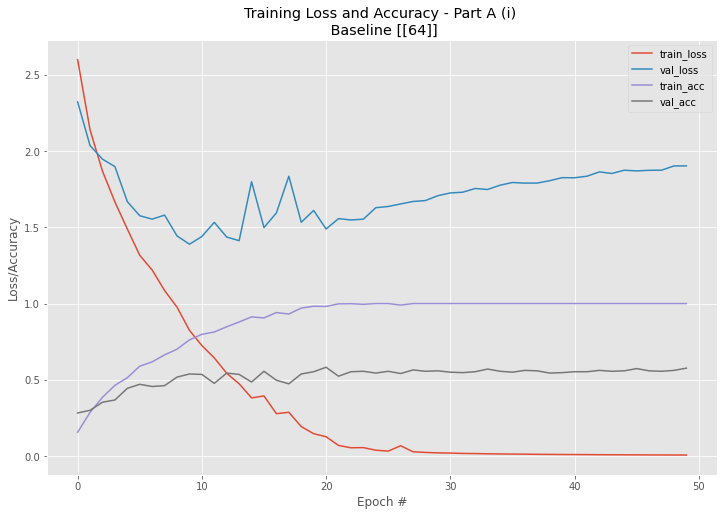

In [ ]:
'''
Baseline model

----------------------------
|   Conv2D  - 64 Filter    |
----------------------------
|        MaxPooling        |
----------------------------
'''

'''
Simple repeating procedure for future experiments:
    1. Define CNN depths using convBlocks
    2. Build and compile model
    3. Train model and get training history
    4. Print max accuracy seen during training
    5. Plot training graph
'''

convBlocks = [[64]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n Baseline ' + str(convBlocks))

---
### V1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              134218752 
_________________________________________________________________
dense_5 (Dense)              (None, 17)               

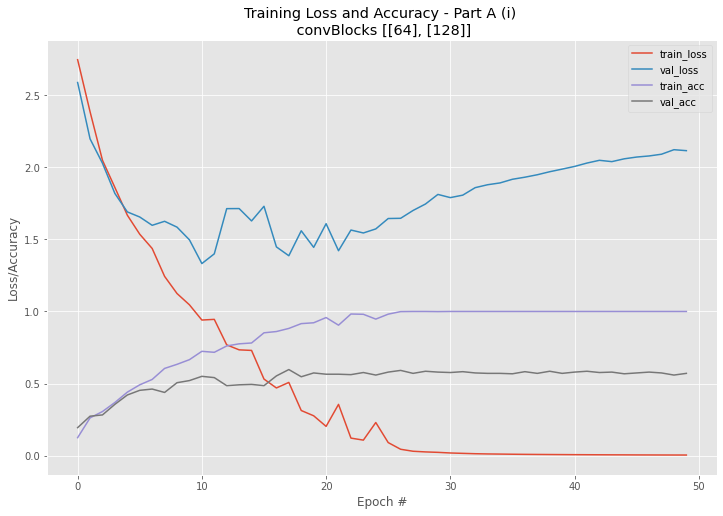

In [ ]:
'''
V1 model

----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks))

---
### V2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)            

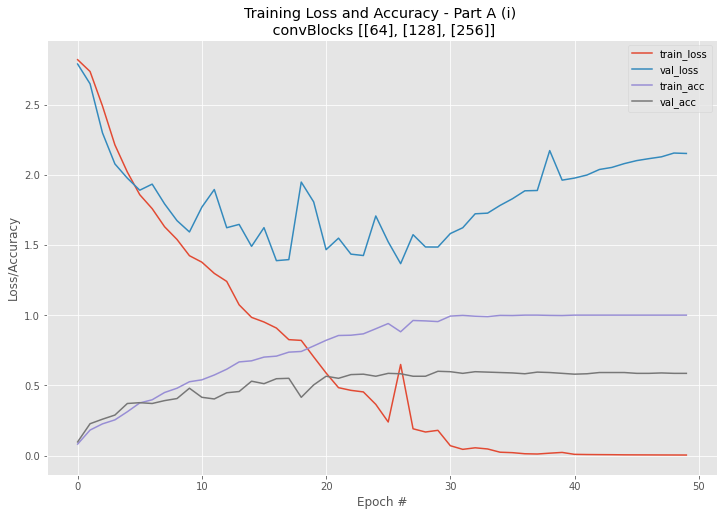

In [ ]:
'''
V2 model

----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks))

---
### V3

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 512)     

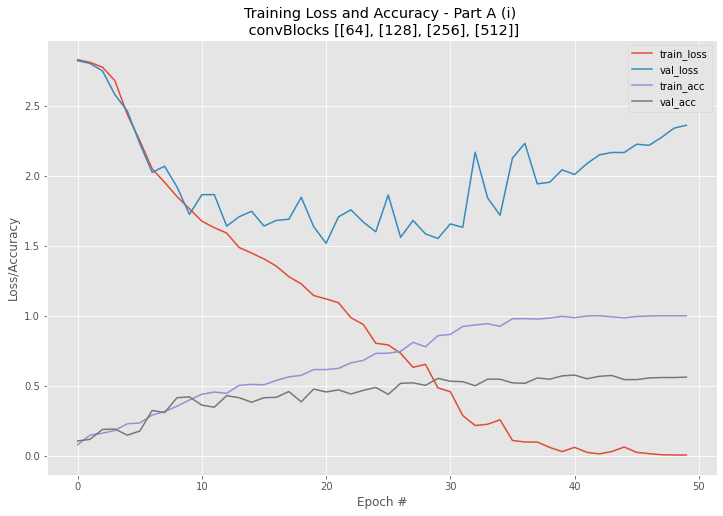

In [ ]:
'''
V3 model

----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks))

---
### V4

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 256)      

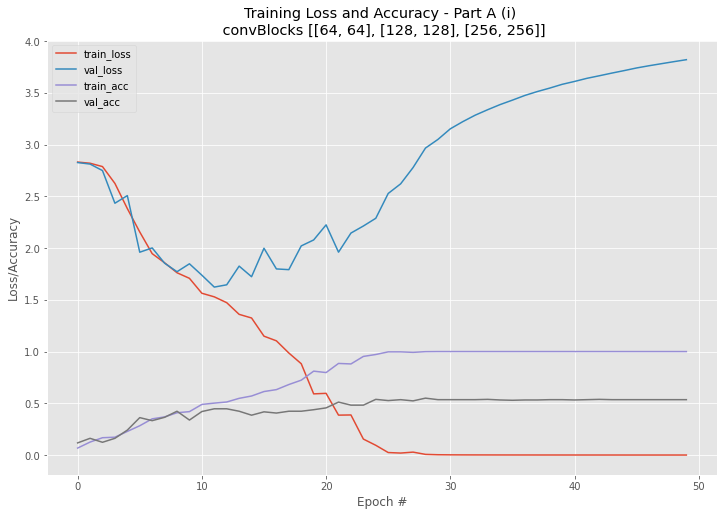

In [ ]:
'''
V4 model

----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64, 64], [128, 128], [256, 256]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks))

---
### V5

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 256)     

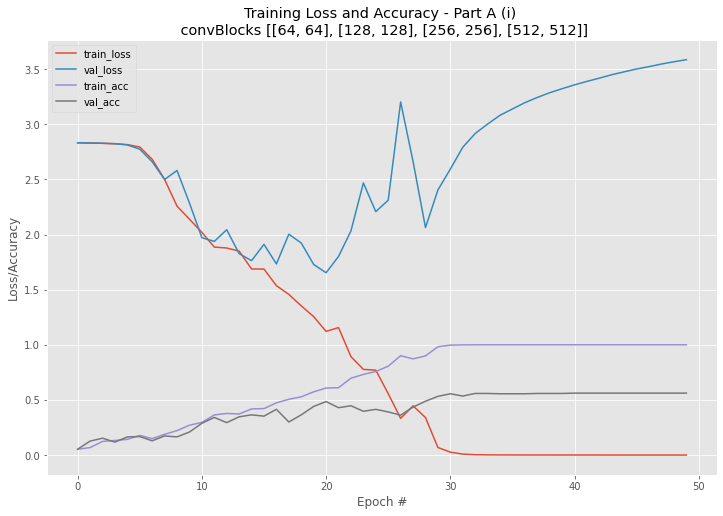

In [ ]:
'''
V5 model

----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64, 64], [128, 128], [256, 256], [512, 512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(valX, valY))
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks))

---
### Introduce Data Augmentation

In [ ]:
'''
Update basic parameters.
EPOCHS is increased as training takes much longer with augmented image data due to image variation.
'''
BATCH_SIZE = 32
EPOCHS = 100

'''
Define parameters for image data augmentation
'''
data_gen_args = dict(
        rotation_range=30,
        zoom_range=0.2,
        shear_range=0.2,
        width_shift_range=0.2, 
        height_shift_range=0.2,
        horizontal_flip=True,
        #vertical_flip=True,
    )

'''
Initialize ImageDataGenerator object
'''
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
train_generator = train_gen.flow(trainX, trainY, batch_size=BATCH_SIZE)

---
### V6

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 16, 16, 512)     

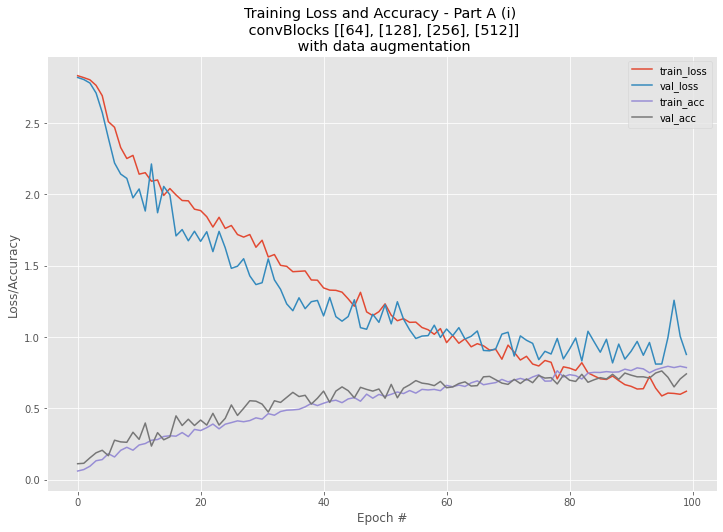

In [ ]:
'''
V6 - V3 model with Data Augmentation

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V7

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 256)     

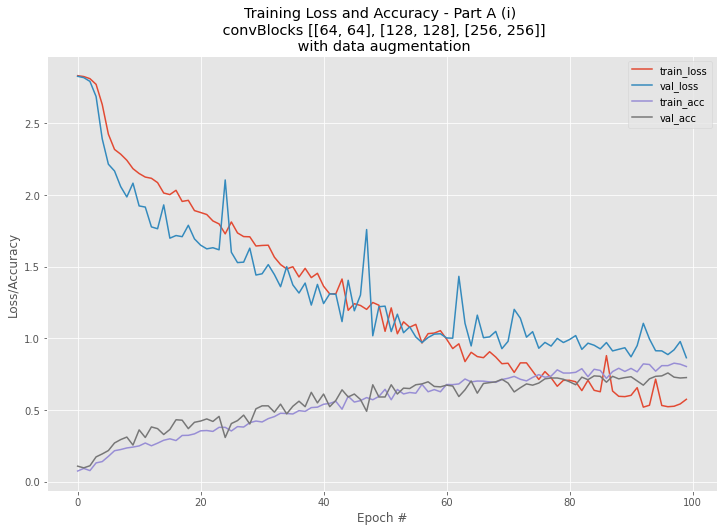

In [ ]:
'''
V7 - V4 model with Data Augmentation

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64, 64], [128, 128], [256, 256]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V8

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 32, 32, 256)     

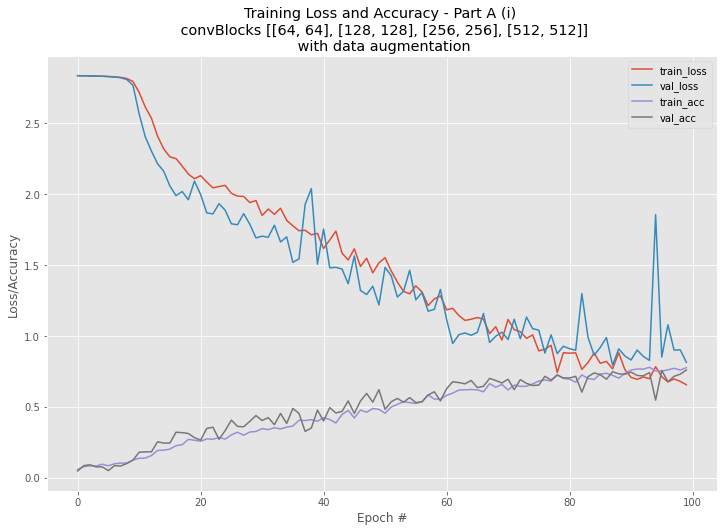

In [ ]:
'''
V8 - V5 model with Data Augmentation

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64, 64], [128, 128], [256, 256], [512, 512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V9

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 512)     

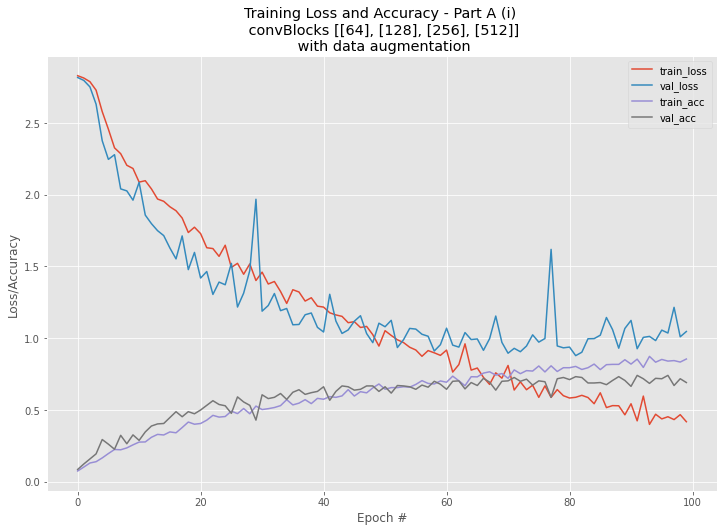

In [ ]:
'''
horizontal_flip=False
'''

data_gen_args = dict(
        rotation_range=30,
        zoom_range=0.2,
        shear_range=0.2,
        width_shift_range=0.2, 
        height_shift_range=0.2,
        horizontal_flip=False,
        #vertical_flip=True,
    )

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
train_generator = train_gen.flow(trainX, trainY, batch_size=BATCH_SIZE)


'''
V9 - V3 model with Data Augmentation 2

horizontal_flip=False

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V10

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 512)     

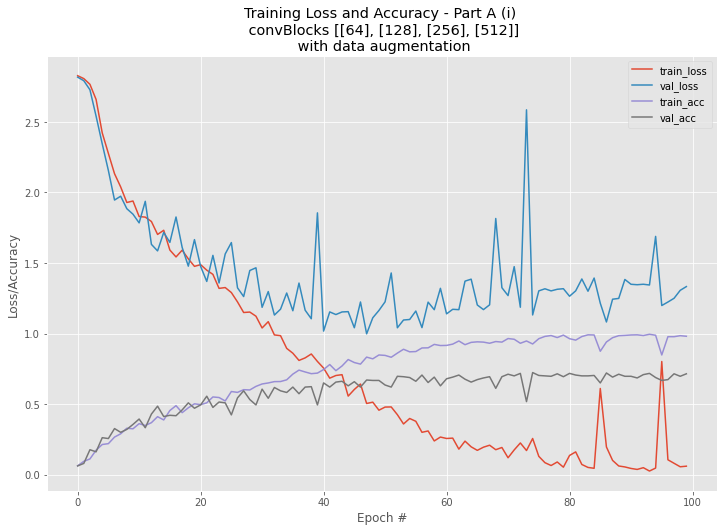

In [ ]:
'''
        width_shift_range=0.0, 
        height_shift_range=0.0,
        horizontal_flip=False,
'''

data_gen_args = dict(
        rotation_range=30,
        zoom_range=0.2,
        shear_range=0.2,
        width_shift_range=0.0, 
        height_shift_range=0.0,
        horizontal_flip=False,
        #vertical_flip=True,
    )

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
train_generator = train_gen.flow(trainX, trainY, batch_size=BATCH_SIZE)


'''
V10 - V3 model with Data Augmentation 3

horizontal_flip=False
width_shift_range=0.0
width_shift_range=0.0

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V11

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 16, 16, 512)     

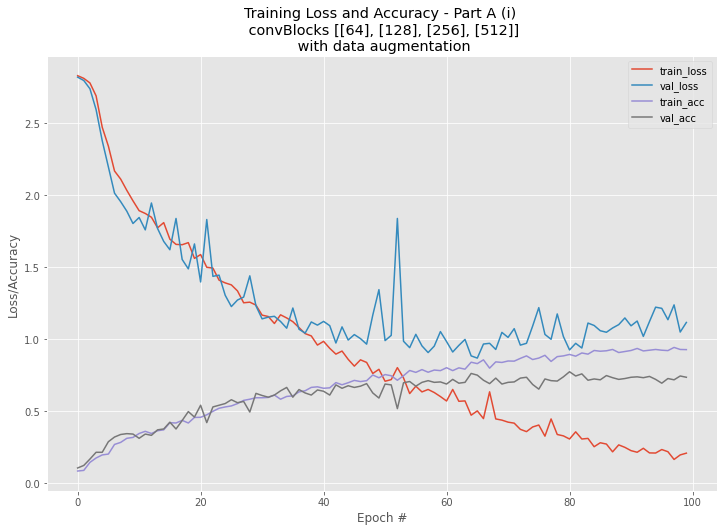

In [ ]:
'''
Smaller parameters than baseline CNN
'''
data_gen_args = dict(
        rotation_range=20,
        zoom_range=0.1,
        shear_range=0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True,
        #vertical_flip=True,
    )

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
train_generator = train_gen.flow(trainX, trainY, batch_size=BATCH_SIZE)


'''
V11 - V3 model with Data Augmentation 4

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

---
### V12

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 16, 16, 512)     

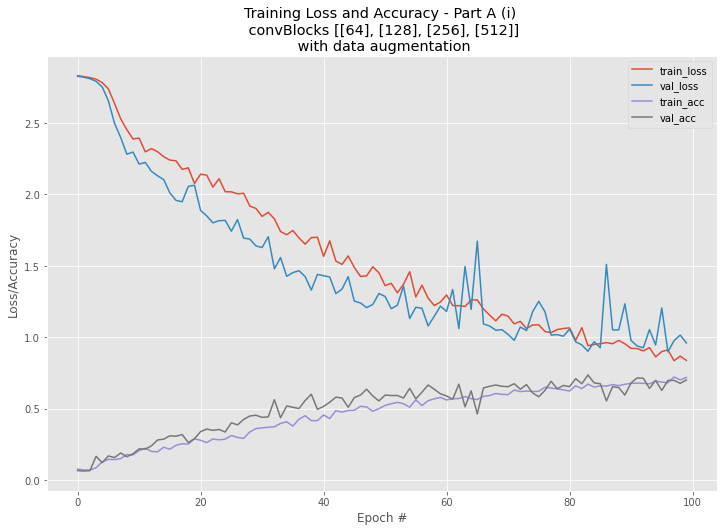

In [ ]:
'''
Larger parameters than baseline CNN
'''

data_gen_args = dict(
        rotation_range=45,
        zoom_range=0.3,
        shear_range=0.3,
        width_shift_range=0.3, 
        height_shift_range=0.3,
        horizontal_flip=True,
        #vertical_flip=True,
    )

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
train_generator = train_gen.flow(trainX, trainY, batch_size=BATCH_SIZE)


'''
V12 - V3 model with Data Augmentation 5

----------------------------
|    Data Augmentation     |
----------------------------
      |           |
      v           v
----------------------------
|   Conv2D  -  64 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  128 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  256 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
|  Conv2D  -  512 Filter   |
----------------------------
|        MaxPooling        |
----------------------------
'''

convBlocks = [[64], [128], [256], [512]]
model = cnn_model(width, height, depth, classes, convBlocks)
history = model.fit(
    train_generator,
    steps_per_epoch=numTrainingSamples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(valX, valY),
    validation_steps=numValidationSamples // BATCH_SIZE)
print('\n\nMax validation accuracy:', max(history.history["val_accuracy"]))
plot_loss(history, EPOCHS, 'Part A (i) \n convBlocks ' + str(convBlocks) + '\n with data augmentation')

## (ii) CNN Ensemble



In [ ]:
import numpy as np

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import pprint as pp

%matplotlib inline

print(tf.__version__)

2.2.0-rc3


Using TensorFlow backend.


### Learner Class

In [ ]:
'''
The Learner class represents an ensemble member
'''
class Learner(object):

    def __init__(self, id, trainX, trainY, valX, valY, epochs, batch_size):
        self.name = 'learner' + str(id)
        
        self.inputShape = (128, 128, 3)
        self.classes = 17

        self.trainX = trainX
        self.trainY = trainY
        self.valX = valX
        self.valY = valY

        self.EPOCHS = epochs
        self.BATCH_SIZE = batch_size

        self.model = self.build()
        self.train_generator = self.data_augmentation()
        self.predictions = None
        self.score = None

        self.best_weights = self.name + "_weights.hdf5"

    def run(self):
        '''
        Main driver for Learner object
        '''
        self.train()
        self.load_weights()
        self.predict()

    def build(self):
        '''
        Dynamic CNN builder
        '''

        print('\nBuilding and compiling model:\n')

        '''
        Define feature maps per convBlock
        '''
        filters_sizes = {
            0:  64,
            1: 128,
            2: 256,
            3: 512
        }

        '''
        Define FC layer sizes
        '''
        dense_layers = {
            0: [1024, 512],
            1: [1024]
        }

        # Instantiate a Sequential model
        model = tf.keras.models.Sequential()

        # Add an InputLayer to allow for dynamic neural assembly 
        model.add(tf.keras.layers.InputLayer(input_shape=self.inputShape))
        
        for convBlock in range(np.random.choice([3, 4])):
            filters = filters_sizes[convBlock]
            conv = np.random.choice([3, 5])
            for _ in range(np.random.choice([1, 2, 3])):
                model.add(tf.keras.layers.Conv2D(filters, (conv, conv), padding='same', activation='relu'))
            
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Flatten())

        for size in dense_layers[np.random.choice([0, 1])]:
            model.add(tf.keras.layers.Dense(size, activation='relu'))
        
        model.add(tf.keras.layers.Dense(self.classes, activation='softmax'))

        opt = tf.keras.optimizers.SGD(learning_rate=0.01)

        # Compile the model
        model.compile(
            optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
        
        # Print the model summary
        model.summary()
            
        # return the constructed network architecture
        return model
    
    def train(self):
        '''
        Training function. Define checkpoint callback, print best result, plot graph.
        
        Note:
            The assigment suggests checkpointing on min val_loss. Results are documented in report.
            Checkpointing on max val_accuracy provides results with highest accuracy.
        '''

        print('\nTraining ensemble learner:', self.name)

        numTrainingSamples = self.trainX.shape[0]
        numValidationSamples = self.valX.shape[0]

        checkpoint = tf.keras.callbacks.ModelCheckpoint(self.best_weights, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

        history = self.model.fit(
            self.train_generator,
            steps_per_epoch=numTrainingSamples // self.BATCH_SIZE,
            epochs=self.EPOCHS,
            validation_data=(self.valX, self.valY),
            validation_steps=numValidationSamples // self.BATCH_SIZE,
            callbacks=[checkpoint],
            verbose=0)
        
        print('\nMax validation accuracy:', max(history.history["val_accuracy"]))
        self.plot_loss(history, self.EPOCHS, 'Part A (ii) Ensemble \n' + self.name)
    
    def load_weights(self):
        '''
        Load the best checkpointed weights.
        '''
        print('\nLoading weights for lowest validation loss.')
        self.model.load_weights(self.best_weights)
        print('Done')
    
    def predict(self):
        '''
        Get predictions and score for validation set.
        '''
        print('\nPredicting validation set classes.')
        self.score = self.model.evaluate(self.valX, self.valY, verbose=0)
        print('Validation set score:', self.score)
        self.predictions = self.model.predict(self.valX, batch_size=self.BATCH_SIZE)
        print('Done')
    
    def data_augmentation(self):
        '''
        Create distinct ImageDataGenerator for each ensemble learner.
        '''
        data_gen_args = dict(
                rotation_range=np.random.randint(20, 75),
                zoom_range=np.random.uniform(0.1, 0.5),
                shear_range=np.random.uniform(0.1, 0.5),
                width_shift_range=np.random.uniform(0.1, 0.5), 
                height_shift_range=np.random.uniform(0.1, 0.5),
                horizontal_flip=True
            )

        train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
        train_generator = train_gen.flow(self.trainX, self.trainY, batch_size=self.BATCH_SIZE)

        print('\nData augmentation with the following parameters:')
        pp.pprint(data_gen_args)

        return train_generator

    def plot_loss(self, history, epochs, name):
        print('\n\n')
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
        plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
        plt.plot(np.arange(0, epochs), history.history["accuracy"], label="train_acc")
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label="val_acc")
        plt.title("Training Loss and Accuracy - {}".format(name))
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend()
        plt.show()

### Train Ensemble (min validation loss)

##################################################

Learner 0

Building and compiling model:

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_206 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________

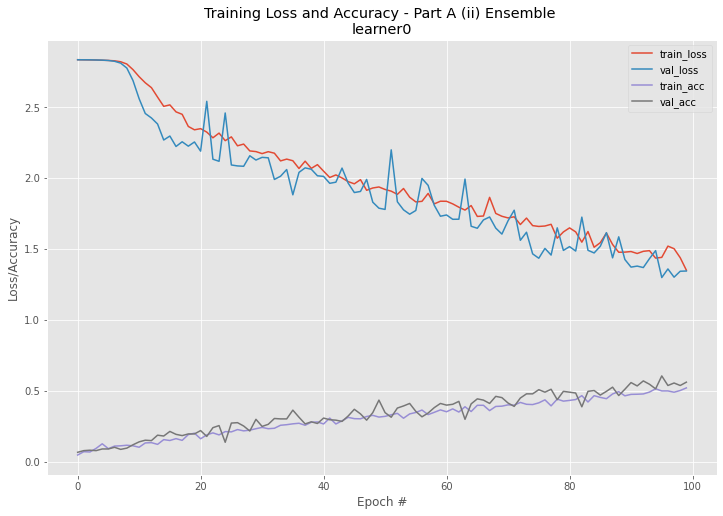


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [1.3222969770431519, 0.6058823466300964]
Done
##################################################

Learner 1

Building and compiling model:

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_214 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 64, 64, 128)       204928    
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 64, 64, 128)       409728    
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 64, 64, 128)       409728    
___

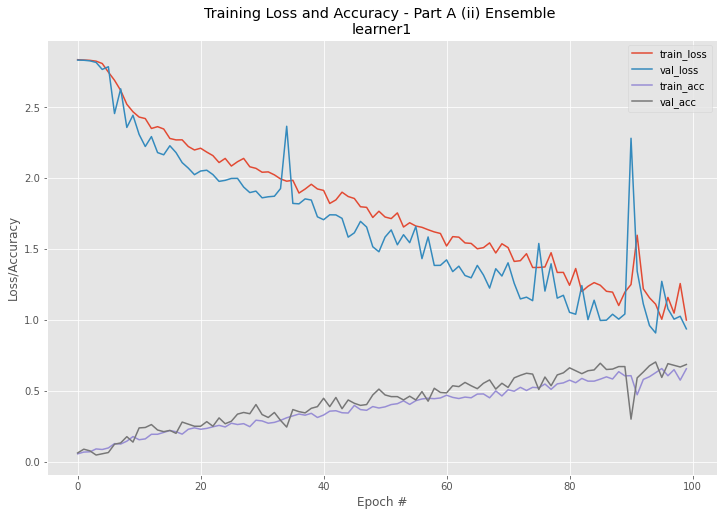


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.9114300012588501, 0.7029411792755127]
Done
##################################################

Learner 2

Building and compiling model:

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_222 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 64, 64, 128)       147584    
___

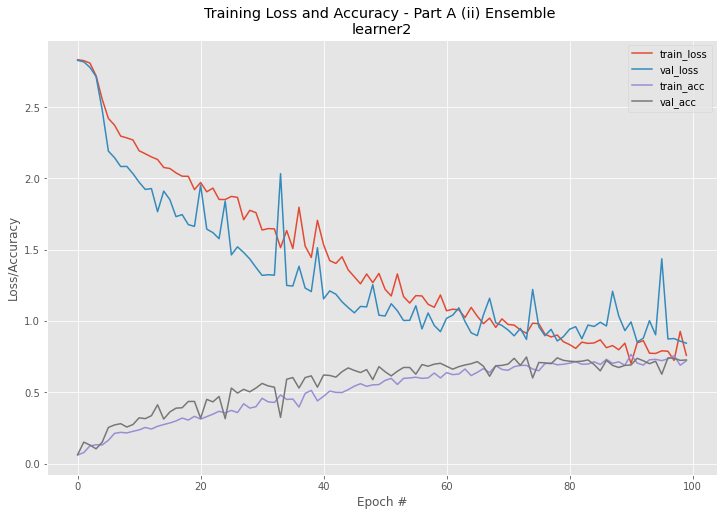


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8418917059898376, 0.7264705896377563]
Done
##################################################

Learner 3

Building and compiling model:

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_228 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_231 (Conv2D)          (None, 64, 64, 128)       73856     
___

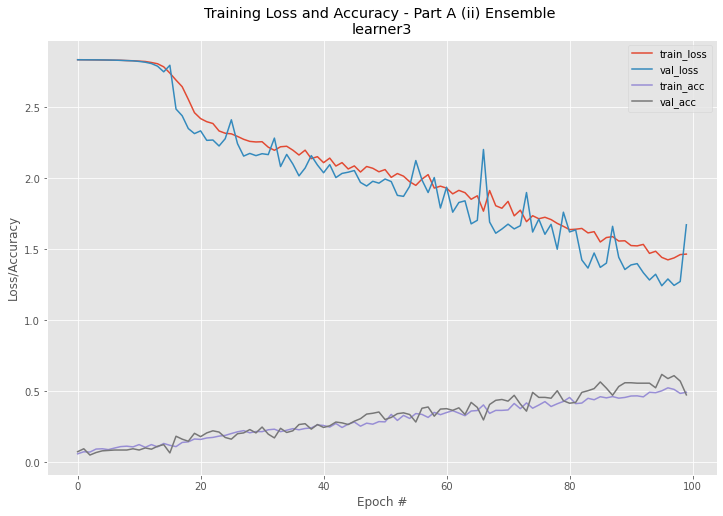


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [1.2541624307632446, 0.6176470518112183]
Done
##################################################

Learner 4

Building and compiling model:

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_236 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_239 (Conv2D)          (None, 64, 64, 128)       147584    
___

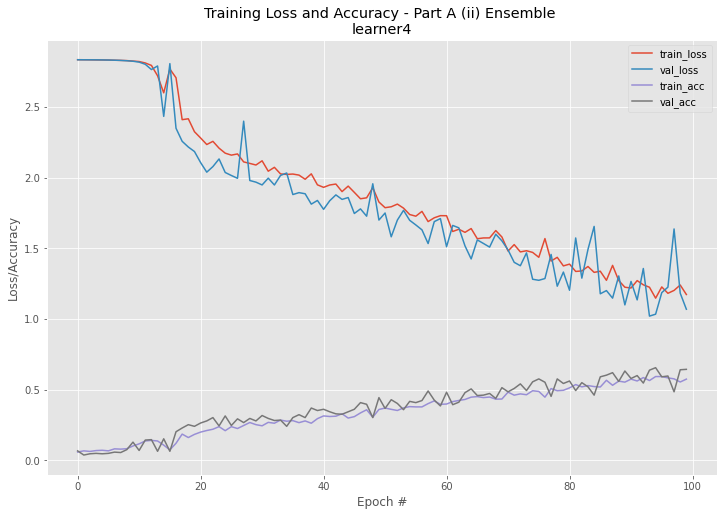


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [1.0266931056976318, 0.6382352709770203]
Done
##################################################

Learner 5

Building and compiling model:

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_245 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_246 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 64, 64, 128)       204928    
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 64, 64, 128)       409728    
___

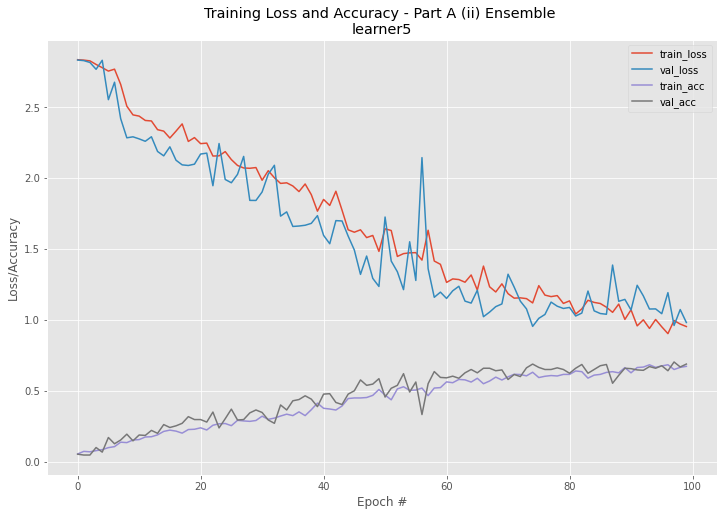


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.9706879258155823, 0.6882352828979492]
Done
##################################################

Learner 6

Building and compiling model:

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_252 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 32, 32, 128)       0         
___

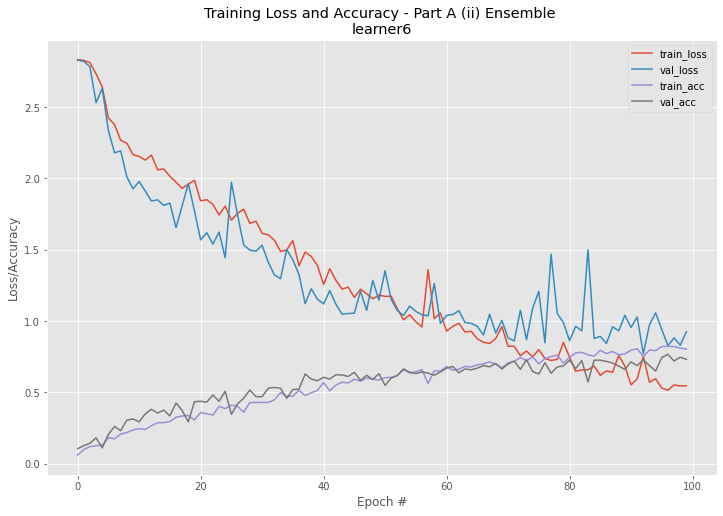


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.7814367413520813, 0.729411780834198]
Done
##################################################

Learner 7

Building and compiling model:

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_258 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_261 (Conv2D)          (None, 64, 64, 128)       73856     
____

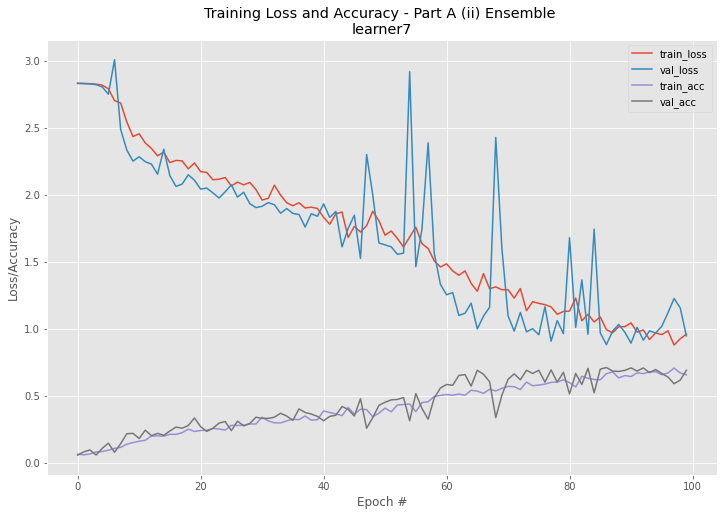


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8930244445800781, 0.7117646932601929]
Done
##################################################

Learner 8

Building and compiling model:

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_266 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 64, 64, 128)       147584    
___

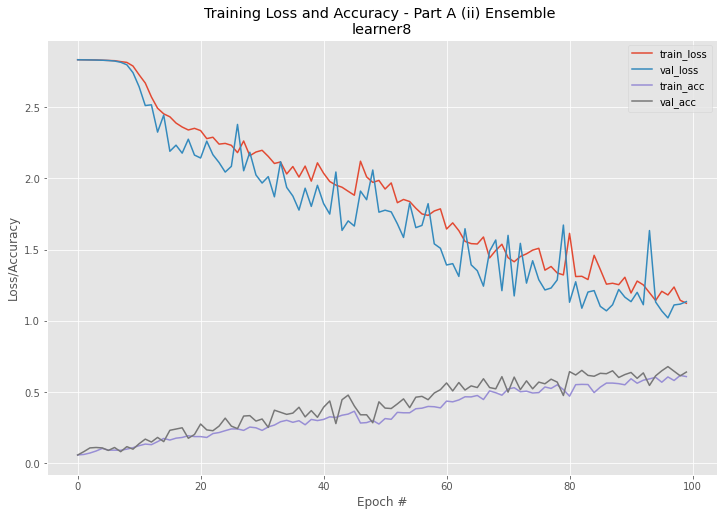


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [1.0413988828659058, 0.679411768913269]
Done
##################################################

Learner 9

Building and compiling model:

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_274 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_275 (Conv2D)          (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_276 (Conv2D)          (None, 32, 32, 256)       819456    
____

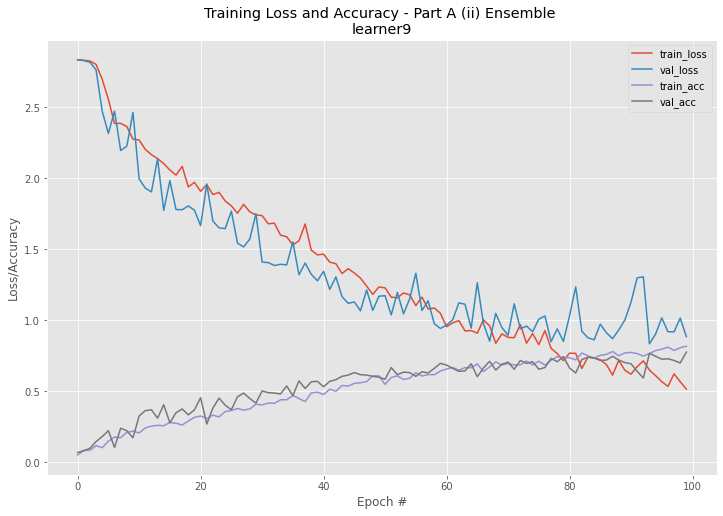


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8389038443565369, 0.7676470875740051]
Done

##################################################"

Final ensemble accuracy: 0.7823529411764706





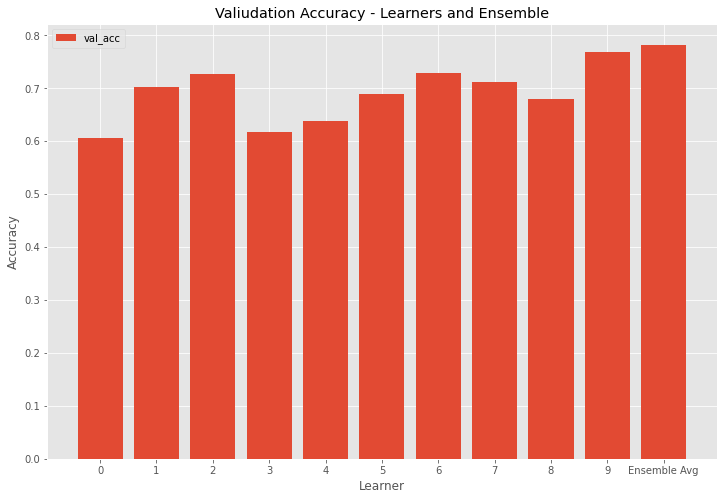

CPU times: user 1h 9min 37s, sys: 4min 28s, total: 1h 14min 6s
Wall time: 1h 7min 16s


In [ ]:
%%time

'''
Ensemble run where each ensemble member checkpoints on minimum validation loss.

NOTE: The learner class above was updated afterwards to reflect checkpointing on maximum validation accuracy.
'''

from sklearn.metrics import accuracy_score

'''
Define base parameters
'''
EPOCHS = 100
BATCH_SIZE = 32

n = 10
ensemble = []
ensemble_probabilities = 0

'''
Loop to create and train n Learners. Store learner predictions and score in ensemble list.
'''
for i in range(n):
    print("##################################################")
    print('\nLearner ' + str(i))
    learner = Learner(i, trainX, trainY, valX, valY, EPOCHS, BATCH_SIZE)
    learner.run()

    ensemble.append((learner.predictions, learner.score))
    ensemble_probabilities += learner.predictions


'''
Get averaged maximum prediction from accumulated ensembles predictions
'''
ensemble_predictions = (ensemble_probabilities/n).argmax(axis=1)
ensemble_accuracy = accuracy_score(valY, ensemble_predictions)

print('\n##################################################"')
print('\nFinal ensemble accuracy:', ensemble_accuracy)


'''
Plot Ensemble stats
'''
accuracies = [ learner[1][1] for learner in ensemble]
accuracies.append(ensemble_accuracy)

print('\n\n')
plt.figure(figsize=(12,8))
plt.bar(np.arange(0, len(accuracies)), accuracies, label="val_acc")
plt.title("Validation Accuracy - Learners and Ensemble")
plt.xticks(np.arange(0, len(accuracies)), ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Ensemble Avg'))
plt.xlabel("Learner")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Train Ensemble (max validation accuracy)

##################################################

Learner 0

Building and compiling model:

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________

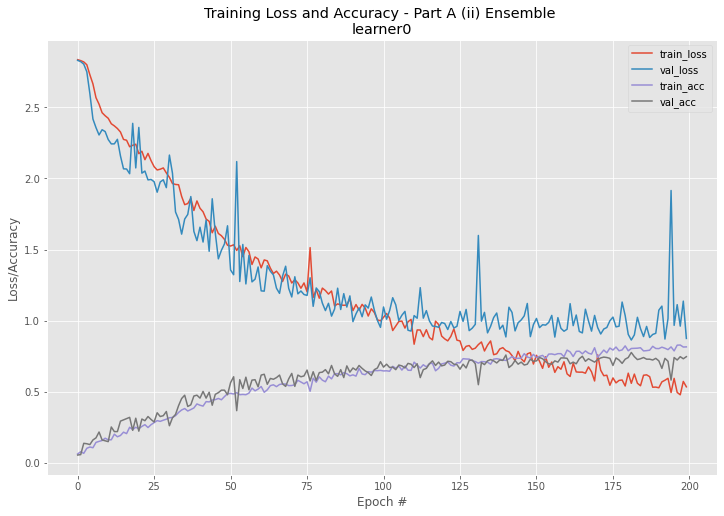


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8796352744102478, 0.7764706015586853]
Done
##################################################

Learner 1

Building and compiling model:

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 64, 64, 128)       147584    
___

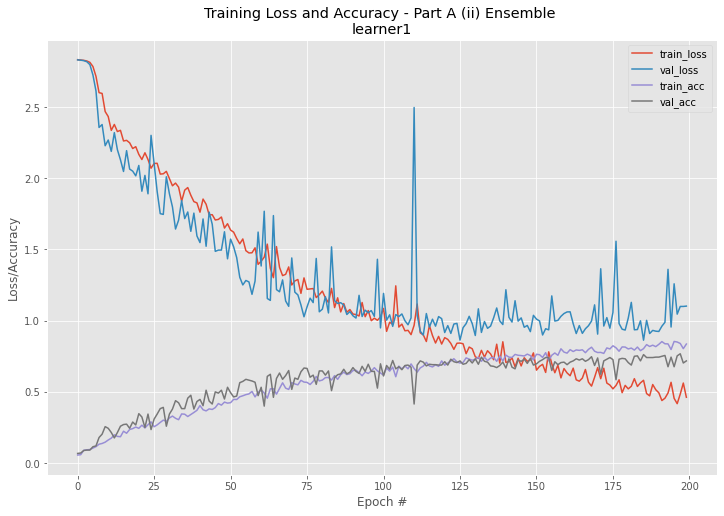


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [1.125780463218689, 0.7676470875740051]
Done
##################################################

Learner 2

Building and compiling model:

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 64, 64, 128)       73856     
____

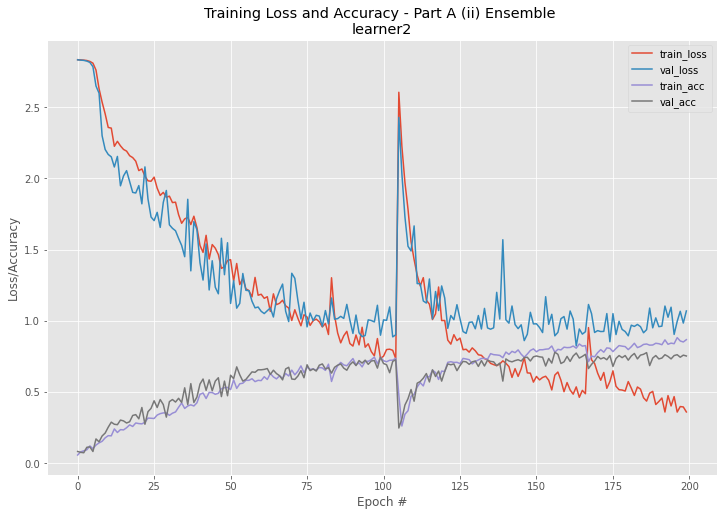


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.9048706293106079, 0.779411792755127]
Done
##################################################

Learner 3

Building and compiling model:

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 64, 64, 128)       73856     
____

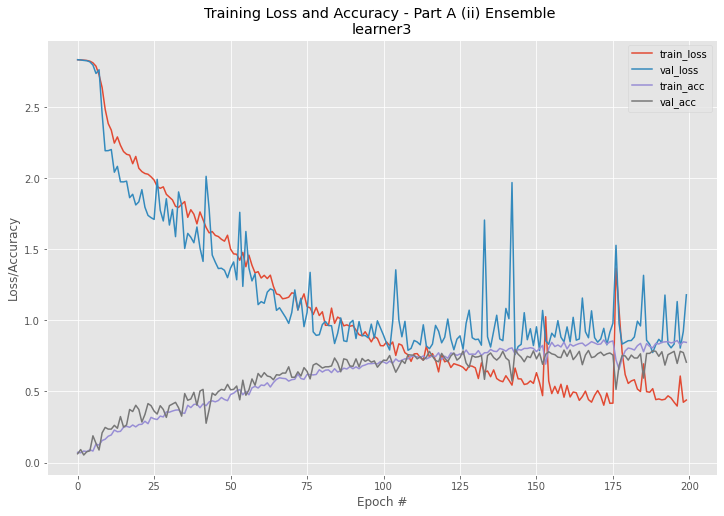


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.763850212097168, 0.7941176295280457]
Done
##################################################

Learner 4

Building and compiling model:

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 64, 64, 128)       409728    
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 64, 64, 128)       409728    
____

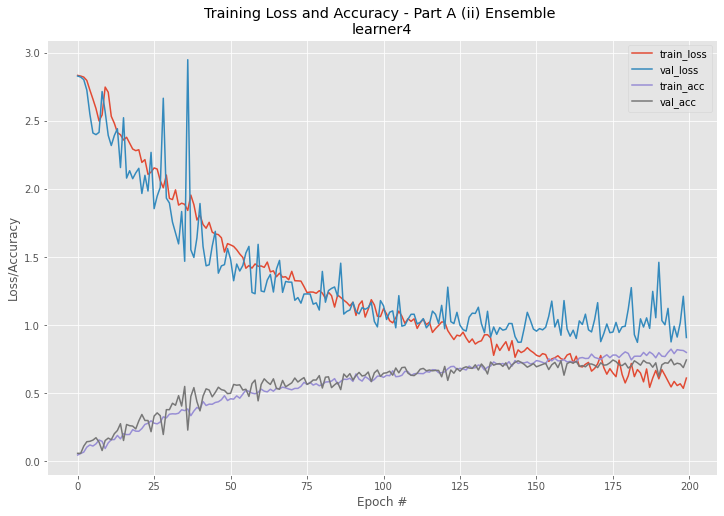


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8929489254951477, 0.75]
Done
##################################################

Learner 5

Building and compiling model:

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 32, 32, 128)       0         
_________________

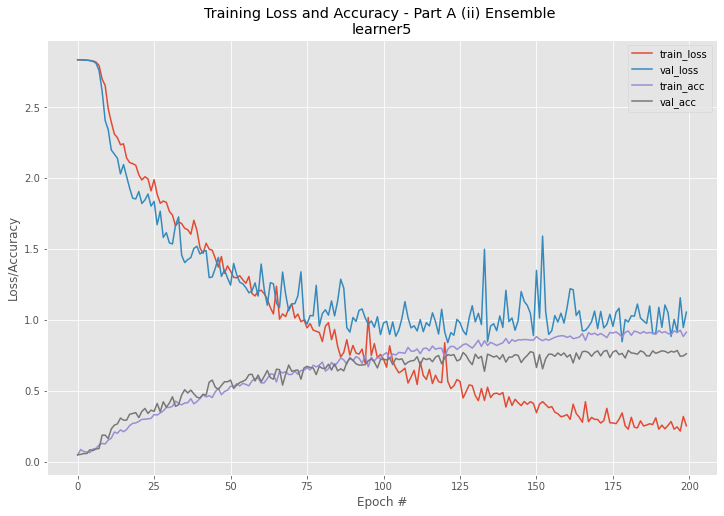


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.9605696201324463, 0.7852941155433655]
Done
##################################################

Learner 6

Building and compiling model:

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 64, 64, 128)       147584    
___

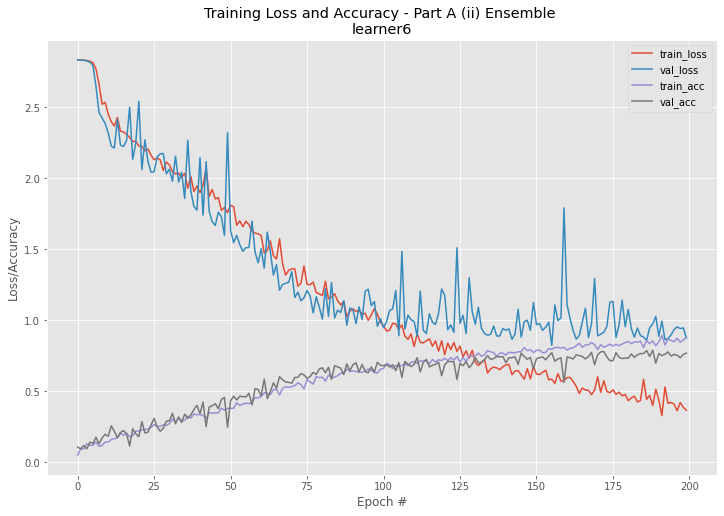


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.9888091683387756, 0.7882353067398071]
Done
##################################################

Learner 7

Building and compiling model:

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 64, 64, 128)       204928    
___

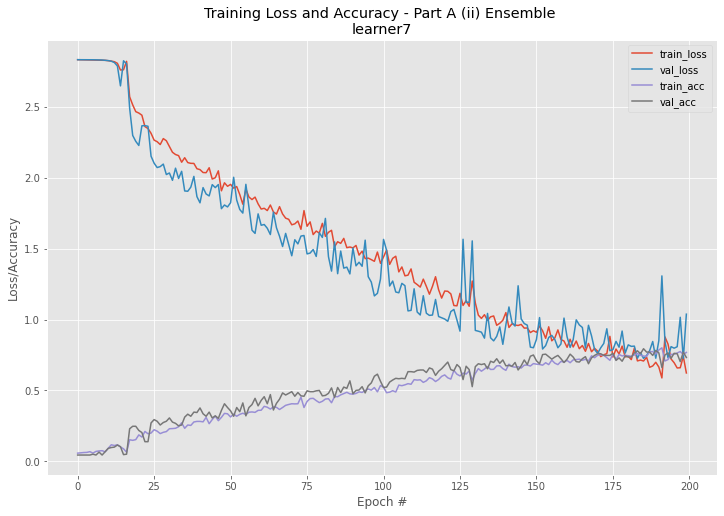


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.7287957668304443, 0.7941176295280457]
Done
##################################################

Learner 8

Building and compiling model:

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 64, 64, 128)       73856     
___

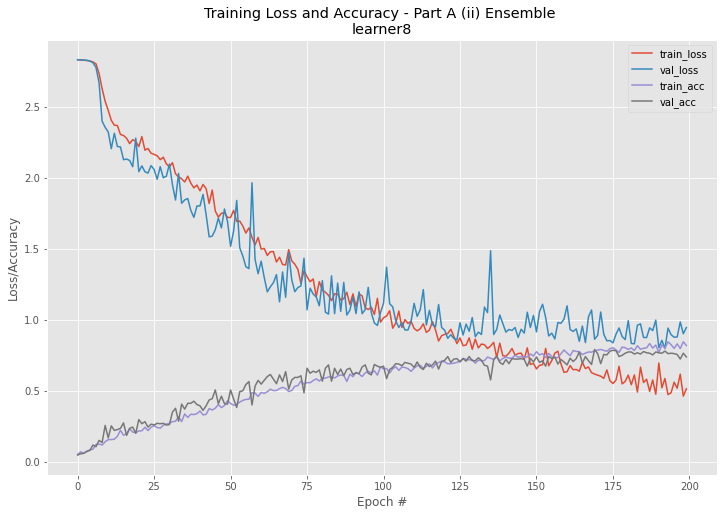


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8726627230644226, 0.7911764979362488]
Done
##################################################

Learner 9

Building and compiling model:

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 128, 128, 64)      102464    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 64, 64, 128)       204928    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 32, 32, 128)       0         
___

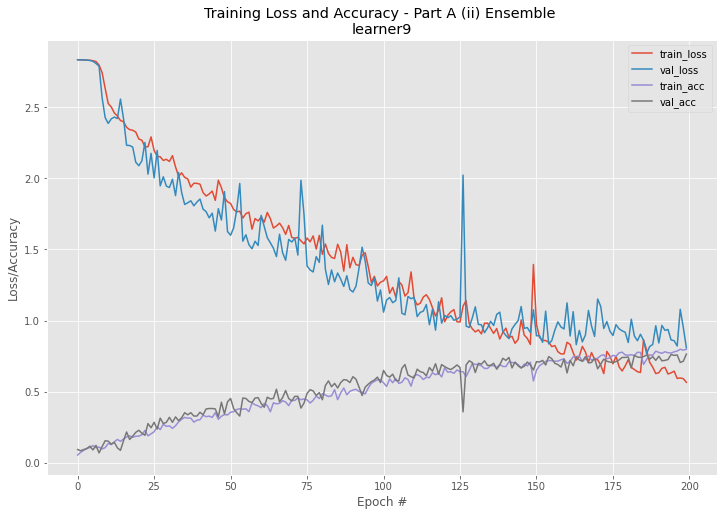


Loading weights for lowest validation loss.
Done

Predicting validation set classes.
Validation set score: [0.8194651007652283, 0.7647058963775635]
Done

##################################################"

Final ensemble accuracy: 0.8352941176470589





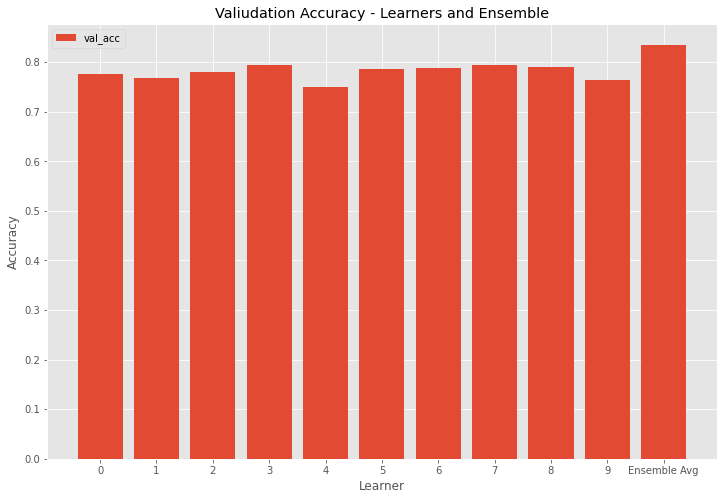

CPU times: user 2h 2min 44s, sys: 6min 32s, total: 2h 9min 16s
Wall time: 1h 57min 47s


In [ ]:
%%time

'''
Ensemble run where each ensemble member checkpoints on maximum validation accuracy
'''

from sklearn.metrics import accuracy_score

'''
Define base parameters
'''
EPOCHS = 200
BATCH_SIZE = 32

n = 10
ensemble = []
ensemble_probabilities = 0

'''
Loop to create and train n Learners. Store learner predictions and score in ensemble list.
'''
for i in range(n):
    print("##################################################")
    print('\nLearner ' + str(i))
    learner = Learner(i, trainX, trainY, valX, valY, EPOCHS, BATCH_SIZE)
    learner.run()

    ensemble.append((learner.predictions, learner.score))
    ensemble_probabilities += learner.predictions


'''
Get averaged maximum prediction from accumulated ensembles predictions
'''
ensemble_predictions = (ensemble_probabilities/n).argmax(axis=1)
ensemble_accuracy = accuracy_score(valY, ensemble_predictions)

print('\n##################################################"')
print('\nFinal ensemble accuracy:', ensemble_accuracy)


'''
Plot Ensemble stats
'''
accuracies = [ learner[1][1] for learner in ensemble]
accuracies.append(ensemble_accuracy)

print('\n\n')
plt.figure(figsize=(12,8))
plt.bar(np.arange(0, len(accuracies)), accuracies, label="val_acc")
plt.title("Validation Accuracy - Learners and Ensemble")
plt.xticks(np.arange(0, len(accuracies)), ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Ensemble Avg'))
plt.xlabel("Learner")
plt.ylabel("Accuracy")
plt.legend()
plt.show()